# Dataloaders example


In [6]:
root = "./DATASET"
threshold = 3
batch_size = 1
image_size = (750, 750)

### Import Dependencies

In [4]:
import numpy as np
from skimage import io
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models

from torchvision.datasets.utils import download_file_from_google_drive
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import os
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
from os import listdir
from os.path import isfile, join
import pandas as pd

output_feat = 2048

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### Vanilla Dataloader - Pytorch
Loading all municipalities present in `DATASET`: images from all municipalities are read here. Dataloder is defined in `dataloaders/vanilla_dataloader`

12
./DATASET/images/23001/image_2016-01-03.tiff ./DATASET/annotations/23001/image_2016-01-03.json
torch.float32 tensor(0.) tensor(1.)


,cases,binary_classification,incidence_rate,multilabel
0,31,1,0,0


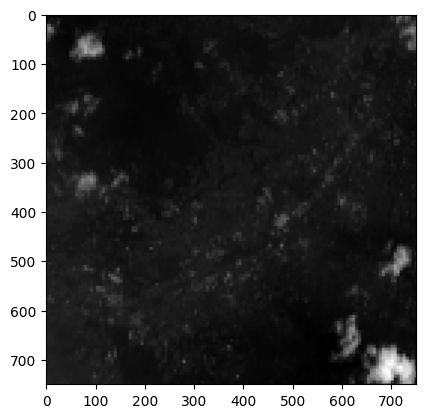

./DATASET/images/23001/image_2016-01-10.tiff ./DATASET/annotations/23001/image_2016-01-10.json
torch.float32 tensor(0.) tensor(1.)


,cases,binary_classification,incidence_rate,multilabel
0,34,1,0,0


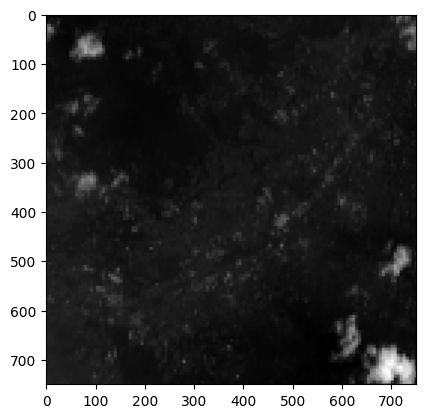

./DATASET/images/23001/image_2016-01-17.tiff ./DATASET/annotations/23001/image_2016-01-17.json
torch.float32 tensor(0.) tensor(1.)


,cases,binary_classification,incidence_rate,multilabel
0,30,1,0,0


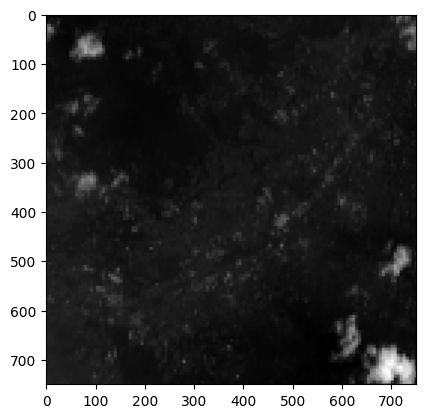

In [3]:
from dataloaders.vanilla_dataloader import vanilaDataloader, get_filepaths

# Add all augmentations here
train_transform = transforms.Compose([
      transforms.Resize(size=image_size)              
])

valid_transform = transforms.Compose([
    transforms.Resize(size=image_size)                    
])
train_set = vanilaDataloader(root = root, transform=train_transform)
loader = DataLoader(train_set, batch_size = batch_size)
print(len(loader))
cont = 0
for x, y in loader:
        print(x.dtype, x.min(), x.max())
        display(pd.DataFrame(y["labels"]))
        # Define your label here:
        label = y["metadata"]["socioeconomic_data"]
        #"""
        plt.imshow((x.squeeze())[:,:,:3])
        plt.show()
        #"""
        cont+=1

        if cont==threshold:
                break


In [4]:
y["labels"]

{'cases': tensor([30]),
 'binary_classification': tensor([1]),
 'incidence_rate': tensor([0]),
 'multilabel': tensor([0])}

## Dataloder by filtering municipalities


In [2]:
# Define the municipality codes that are to be used

municipality = [23001] 

4


,cases,binary_classification,incidence_rate,multilabel
0,31,1,0,0


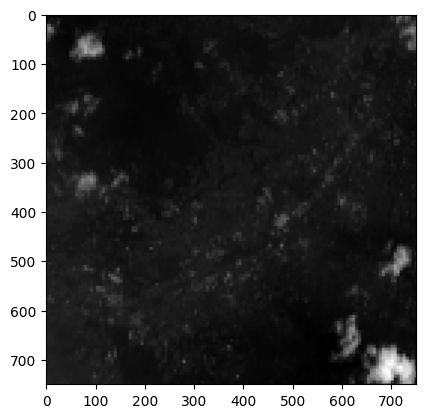

,cases,binary_classification,incidence_rate,multilabel
0,34,1,0,0


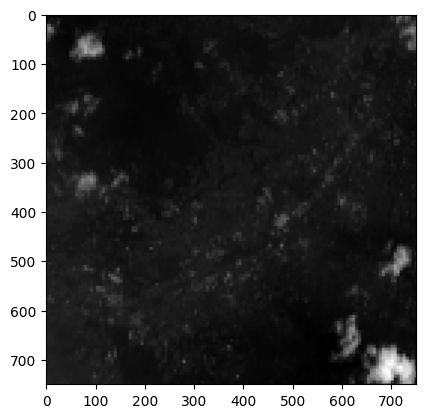

,cases,binary_classification,incidence_rate,multilabel
0,30,1,0,0


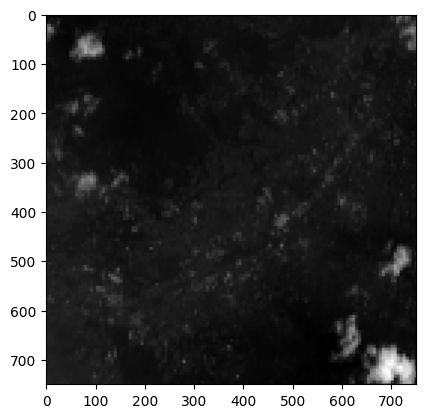

In [7]:
from dataloaders.filtered_dataloader import filteredDataloader, get_filepaths_filtered
# Add all augmentations here
train_transform = transforms.Compose([
      transforms.Resize(size=image_size)              
])

valid_transform = transforms.Compose([
    transforms.Resize(size=image_size)      
])
train_set = filteredDataloader(root = root, municipality = municipality, transform=train_transform)
loader = DataLoader(train_set, batch_size = batch_size)
print(len(loader))

cont = 0

for x, y in loader:
        display(pd.DataFrame(y["labels"]))
        # Define your label here:
        label = y["metadata"]["socioeconomic_data"]
        #"""
        plt.imshow((x.squeeze())[:,:,:3])
        plt.show()
        #"""
        cont+=1

        if cont==threshold:
                break